In [87]:
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import awkward as ak
import matplotlib.pyplot as plt


In [88]:
filename ="/pnfs/psi.ch/cms/trivcat/store/mc/Run3Summer22EENanoAODv12/VBFHHto4B_CV_1_C2V_1_C3_1_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/80000/a897cbbf-ea0b-40d5-b850-f9f24a7906a5.root"
events = NanoEventsFactory.from_root(filename, schemaclass=NanoAODSchema, entry_stop=10000).events()
print("Events read:", len(events))


Events read: 10000


# Use the last b quark for the matching of the b-quarks from higgs decay

In [89]:
# add column with the index
events.GenPart=ak.with_field(events.GenPart, ak.local_index(events.GenPart, axis=1), "index")
print(events.GenPart.index[0])
# get last bquark copy
isB = abs(events.GenPart.pdgId) == 5
isLast = events.GenPart.hasFlags(["isLastCopy"])
isHard = events.GenPart.hasFlags(["fromHardProcess"])
bquarks_last = events.GenPart[isB & isLast & isHard]
# print(bquarks_last.pdgId, bquarks_last.genPartIdxMother)
b_quarks = bquarks_last
while True:
    print("\nloop")
    b_mother = events.GenPart[b_quarks.genPartIdxMother]
    print("old: ", "pdg", b_quarks.pdgId, "mother_idx",b_quarks.genPartIdxMother, "pt", b_quarks.pt, "index", b_quarks.index)
    print("mother: ", "pdg", b_mother.pdgId, "mother_idx",b_mother.genPartIdxMother, "pt", b_mother.pt)
    # break
    b_quarks = ak.where(abs(b_mother.pdgId) == 5, b_mother, b_quarks)
    print("new: ", "pdg", b_quarks.pdgId, "mother_idx",b_quarks.genPartIdxMother, "pt", b_quarks.pt)

    print(ak.any(abs(b_mother.pdgId) != 25, axis=1))
    if ak.all(abs(b_mother.pdgId) == 25):
        break

print(b_quarks.pdgId, b_quarks.genPartIdxMother, b_quarks.pt)
print(b_quarks.genPartIdxMother, len(b_quarks.genPartIdxMother))


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, ... 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]

loop
old:  pdg [[5, -5, 5, -5], [-5, 5, 5, -5], [5, -5, ... -5, 5], [-5, -5, 5, 5], [5, -5, 5, -5]] mother_idx [[14, 15, 17, 13], [15, 14, 16, 17], [20, ... [13, 16, 12, 15], [12, 13, 10, 11]] pt [[26.9, 28.1, 50.4, 76.2], [27.2, 60.6, 31.9, ... 56.9, 12.8], [24.8, 119, 89, 58.5]] index [[18, 24, 26, 29], [18, 20, 25, 26], [25, ... [14, 17, 22, 25], [17, 19, 24, 25]]
mother:  pdg [[5, -5, 5, -5], [-5, 5, 5, -5], [5, -5, ... -5, 5], [-5, -5, 5, 5], [5, -5, 5, -5]] mother_idx [[11, 11, 12, 10], [12, 12, 13, 13], [16, 14, ... 9], [10, 11, 10, 11], [9, 9, 8, 8]] pt [[41.5, 101, 50.4, 91.5], [55.8, 66.5, 71, ... 65.8, 25.4], [30.1, 130, 94.8, 58.8]]
new:  pdg [[5, -5, 5, -5], [-5, 5, 5, -5], [5, -5, ... -5, 5], [-5, -5, 5, 5], [5, -5, 5, -5]] mother_idx [[11, 11, 12, 10], [12, 12, 13, 13], [16, 14, ... 9], [10, 11, 10, 11], [9, 9, 8, 8]] pt [[41.5, 101, 50.4, 91.5], [55.8, 66.5, 71, ... 65.8, 25.4], [30.1, 1

In [90]:
# order higgs pt
higgs = events.GenPart[
            (events.GenPart.pdgId == 25)
            & events.GenPart.hasFlags(["fromHardProcess"])
            & events.GenPart.hasFlags(["isLastCopy"])
        ]
higgs = higgs[ak.num(higgs.childrenIdxG, axis=2) == 2]
print(higgs.pt, higgs.childrenIdxG, higgs.children.pdgId, higgs.children.pt)
print(ak.argsort(higgs.pt,ascending=False))
print(higgs.index)
higgs=higgs[ak.argsort(higgs.pt,ascending=False)]
print(higgs.pt, higgs.childrenIdxG, higgs.children.pdgId, higgs.children.pt)
print(higgs.index)

provenance = ak.where(b_quarks.genPartIdxMother == higgs.index[:,0], 1, 2)
print(provenance)


[[195, 71.8], [66, 43.4], [28.7, 14.2], ... [99.8, 34.6], [17.2, 54.9], [94, 105]] [[[12, 13], [14, 15]], [[67, 68, ... 561605]], [[561659, 561660], [561661, 561662]]] [[[5, -5], [5, -5]], [[5, -5], [5, -5]], ... [[5, -5], [5, -5]], [[5, -5], [5, -5]]] [[[132, 91.5], [41.5, 101]], [[66.5, 55.8, ... 65.2]], [[94.8, 58.8], [30.1, 130]]]
[[0, 1], [0, 1], [0, 1], [0, 1], [0, 1], ... [1, 0], [1, 0], [0, 1], [1, 0], [1, 0]]
[[10, 11], [12, 13], [14, 15], [10, 11], ... [12, 13], [8, 9], [10, 11], [8, 9]]
[[195, 71.8], [66, 43.4], [28.7, 14.2], ... [99.8, 34.6], [54.9, 17.2], [105, 94]] [[[12, 13], [14, 15]], [[67, 68, ... 561602]], [[561661, 561662], [561659, 561660]]] [[[5, -5], [5, -5]], [[5, -5], [5, -5]], ... [[5, -5], [5, -5]], [[5, -5], [5, -5]]] [[[132, 91.5], [41.5, 101]], [[66.5, 55.8, ... 55.9]], [[30.1, 130], [94.8, 58.8]]]
[[10, 11], [12, 13], [14, 15], [10, 11], ... [13, 12], [8, 9], [11, 10], [9, 8]]
[[2, 2, 1, 1], [1, 1, 2, 2], [1, 1, 2, 2, ... 1, 1, 2], [2, 1, 2, 1], [1, 1, 2,

# VBF partons

In [91]:
# get mother of higgs
higgs_first_copy=events.GenPart[
            (events.GenPart.pdgId == 25)
            & events.GenPart.hasFlags(["fromHardProcess"])
            & events.GenPart.hasFlags(["isFirstCopy"])]
higgs_mother = events.GenPart[higgs_first_copy.genPartIdxMother]
print(higgs_mother.pdgId)

[[2, 2], [1, 1], [2, 2], [2, 2], [-2, -2, ... 1], [2, 2], [2, 2], [1, 1], [-2, -2]]


In [92]:
print(events.GenPart)
events.GenPart=ak.with_field(events.GenPart, ak.local_index(events.GenPart, axis=1), "index")
genpart= events.GenPart
single_event=-1
if (single_event!=-1):
    genpart= events.GenPart[single_event]


isQuark = abs(genpart.pdgId) < 7
isLast = genpart.hasFlags(["isLastCopy"])
isHard = genpart.hasFlags(["fromHardProcess"])


[[GenParticle, GenParticle, GenParticle, ... GenParticle, GenParticle, GenParticle]]


In [93]:

vbf_quarks_last = genpart[isQuark & isLast & isHard]
vbf_quarks_last = vbf_quarks_last[vbf_quarks_last.genPartIdxMother!=-1]
vbf_quarks = vbf_quarks_last
i=0
while True:
    print("\n#############################loop")
    # vbf_quarks=vbf_quarks[vbf_quarks.genPartIdxMother!=-1]
    vbf_quark_mother = genpart[vbf_quarks.genPartIdxMother]
    # mother can't be higgs to avoid getting the quarks from higgs decay
    print("quark_last: ", "pdg", vbf_quarks_last.pdgId, "mother_idx",vbf_quarks_last.genPartIdxMother,"index", vbf_quarks_last.index)
    print("quark: ", "pdg", vbf_quarks.pdgId, "mother_idx",vbf_quarks.genPartIdxMother,"index", vbf_quarks.index)
    print("mother: ", "pdg", vbf_quark_mother.pdgId, "mother_idx",vbf_quark_mother.genPartIdxMother,  "index", vbf_quark_mother.index)
    mother_isnotH = abs(vbf_quark_mother.pdgId) != 25
    vbf_quarks= vbf_quarks[mother_isnotH]
    vbf_quark_mother = vbf_quark_mother[mother_isnotH]
    vbf_quarks_last = vbf_quarks_last[mother_isnotH]
    print("\nquark_last1: ", "pdg", vbf_quarks_last.pdgId, "mother_idx",vbf_quarks_last.genPartIdxMother,"index", vbf_quarks_last.index)
    print("quark1: ", "pdg", vbf_quarks.pdgId, "mother_idx",vbf_quarks.genPartIdxMother,"index", vbf_quarks.index)
    print("mother1: ", "pdg", vbf_quark_mother.pdgId, "mother_idx",vbf_quark_mother.genPartIdxMother,  "index", vbf_quark_mother.index)

    #check if any of the children of mother is a higgs
    mother_children = vbf_quark_mother.children
    print("\nchildren of mother: ", "pdg", mother_children.pdgId, "mother_idx",mother_children.genPartIdxMother,  "index", mother_children.index)
    #cnotain two higgs in the children
    mother_children_isH = ak.sum((mother_children.pdgId == 25), axis=-1)==2
    print("mother_children_isH", mother_children_isH)

    if ak.all(mother_children_isH):
        break
    vbf_quarks = ak.where(mother_children_isH, vbf_quarks, vbf_quark_mother)
    i+=1

print("\n\nnum of loops", i)
if single_event==-1:
    #check if for each event there are two vbf quarks
    if(ak.any(ak.num(vbf_quarks.pt, axis=-1)!=2)):
        print("\n\nERROR: not two vbf quarks")
        for i in range(len(vbf_quarks)):
            if len(vbf_quarks.pt[i])!=2:
                print("\nevent", i, "number of vbf quarks", len(vbf_quarks.pt[i]))
                print("vbf quark_last : ", "pdg", vbf_quarks_last.pdgId[i], "mother_idx",vbf_quarks_last.genPartIdxMother[i],"index", vbf_quarks_last.index[i])
                print("vbf quark: ", "pdg", vbf_quarks.pdgId[i], "mother_idx",vbf_quarks.genPartIdxMother[i],"index", vbf_quarks.index[i])
                print("mother: ", "pdg", vbf_quark_mother.pdgId[i], "mother_idx",vbf_quark_mother.genPartIdxMother[i],  "index", vbf_quark_mother.index[i])
                print("children: ", "pdg", mother_children.pdgId[i], "mother_idx",mother_children.genPartIdxMother[i],  "index", mother_children.index[i])
        exit(1)


#############################loop
quark_last:  pdg [[5, 2, 2, -5, 5, -5], [-5, 5, 1, 5, -5, ... -5, 5, 5, 1, 2], [1, 5, -5, -1, 5, -5]] mother_idx [[14, 5, 4, 15, 17, 13], [15, 14, 5, 16, ... 12, 15, 5, 4], [4, 12, 13, 5, 10, 11]] index [[18, 20, 21, 24, 26, 29], [18, 20, 22, ... 25, 30, 34], [15, 17, 19, 23, 24, 25]]
quark:  pdg [[5, 2, 2, -5, 5, -5], [-5, 5, 1, 5, -5, ... -5, 5, 5, 1, 2], [1, 5, -5, -1, 5, -5]] mother_idx [[14, 5, 4, 15, 17, 13], [15, 14, 5, 16, ... 12, 15, 5, 4], [4, 12, 13, 5, 10, 11]] index [[18, 20, 21, 24, 26, 29], [18, 20, 22, ... 25, 30, 34], [15, 17, 19, 23, 24, 25]]
mother:  pdg [[5, 2, 2, -5, 5, -5], [-5, 5, 1, 5, -5, ... -5, 5, 5, 1, 2], [1, 5, -5, -1, 5, -5]] mother_idx [[11, 0, 0, 11, 12, 10], [12, 12, 0, 13, 13, ... 10, 11, 0, 0], [0, 9, 9, 0, 8, 8]] index [[14, 5, 4, 15, 17, 13], [15, 14, 5, 16, ... 12, 15, 5, 4], [4, 12, 13, 5, 10, 11]]

quark_last1:  pdg [[5, 2, 2, -5, 5, -5], [-5, 5, 1, 5, -5, ... -5, 5, 5, 1, 2], [1, 5, -5, -1, 5, -5]] mother_idx 


quark_last1:  pdg [[2, 2, 5], [1, 2], [4, 5, 1], [4, 1], ... [2, 5, -2], [2, 1], [1, 2], [1, -1]] mother_idx [[5, 4, 17], [5, 4], [4, 20, 5], [4, 5], ... [4, 18, 5], [4, 5], [5, 4], [4, 5]] index [[20, 21, 26], [22, 29], [23, 25, 33], ... 27, 32], [32, 33], [30, 34], [15, 23]]
quark1:  pdg [[2, 2, 5], [1, 2], [4, 5, 1], [4, 1], ... [2, 5, -2], [2, 1], [1, 2], [1, -1]] mother_idx [[0, 0, 12], [0, 0], [0, 16, 0], [0, 0], ... [0, 14, 0], [0, 0], [0, 0], [0, 0]] index [[5, 4, 17], [5, 4], [4, 20, 5], [4, 5], ... [4, 18, 5], [4, 5], [5, 4], [4, 5]]
mother1:  pdg [[2, 2, 5], [1, 1], [2, 5, 2], [2, 2], ... [2, 5, 2], [2, 2], [1, 1], [-2, -2]] mother_idx [[-1, -1, 10], [-1, -1], [-1, 14, -1], ... 12, -1], [-1, -1], [-1, -1], [-1, -1]] index [[0, 0, 12], [0, 0], [0, 16, 0], [0, 0], ... [0, 14, 0], [0, 0], [0, 0], [0, 0]]

children of mother:  pdg [[[25, 25, 2, 2], [25, 25, 2, 2], [21, 5, ... [[25, 25, 1, -1], [25, 25, 1, -1]]] mother_idx [[[0, 0, 0, 0], [0, 0, 0, 0], [12, 12, 12, 12, ... 0]], 

In [94]:
if single_event==-1:
    # check if vbf quark: eta > 2.5 and delta eta >5
    print(vbf_quarks.eta)
    print(abs(vbf_quarks.eta[:,0] - vbf_quarks.eta[:,1]))
    print(vbf_quarks_last.eta)
    print(abs(vbf_quarks_last.eta[:,0] - vbf_quarks_last.eta[:,1]))

[[3.78, -3.41], [-3.66, 4.12], [-2.79, 3.44, ... 3.59], [-2.61, 3.41], [-4.48, 3.08]]
[7.2, 7.79, 6.23, 6.38, 7.84, 5.05, 4.49, ... 5.37, 4.1, 4.89, 6.94, 6.02, 7.56]
[[3.9, -3.42], [-3.48, 3.49], [-2.8, 4.11, ... 3.59], [-4.3, 3.44], [-1.95, 3.35]]
[7.32, 6.98, 6.91, 6.45, 7.97, 5.14, 4.54, ... 5.56, 4.14, 6.3, 6.77, 7.73, 5.3]


# the quarkVBF which weneed to match to the reco jets are vbf_quarks_last

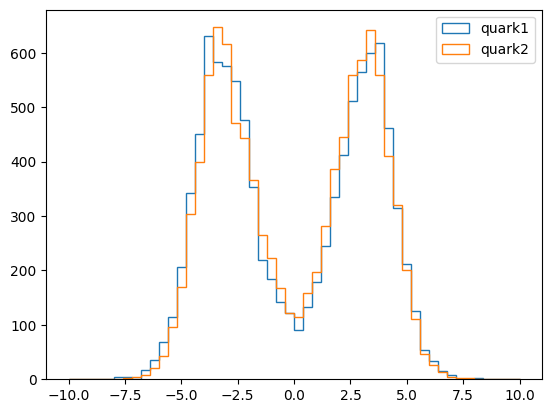

In [97]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(vbf_quarks_last.eta[:,0], bins=50, range=(-10,10), histtype='step', label='quark1')
plt.hist(vbf_quarks_last.eta[:,1], bins=50, range=(-10,10), histtype='step', label='quark2')
plt.legend(loc='upper right')
plt.show()

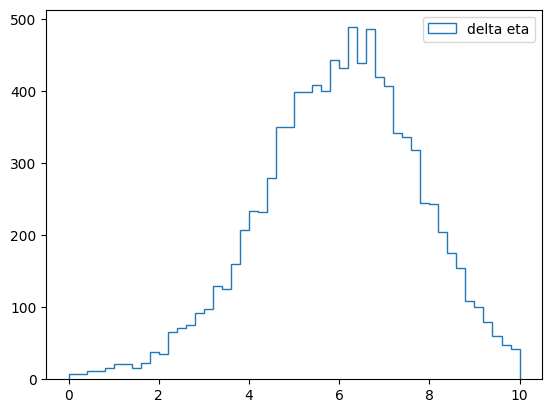

In [98]:
# plot delta eta
plt.figure()
plt.hist(abs(vbf_quarks_last.eta[:,0] - vbf_quarks_last.eta[:,1]), bins=50, range=(0,10), histtype='step', label='delta eta')
plt.legend(loc='upper right')
plt.show()

In [100]:
vbf_quarks_last_opposite_eta=vbf_quarks_last[vbf_quarks_last.eta[:,0]*vbf_quarks_last.eta[:,1]<0]

print("len vbf_quarks_last_opposite_eta", len(vbf_quarks_last_opposite_eta))
print("len vbf_quarks_last", len(vbf_quarks_last))
print("ratio opposite eta", len(vbf_quarks_last_opposite_eta)/len(vbf_quarks_last))


len vbf_quarks_last_opposite_eta 9606
len vbf_quarks_last 10000
ratio opposite eta 0.9606


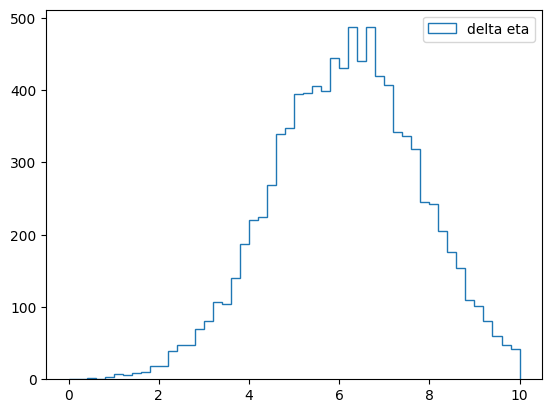

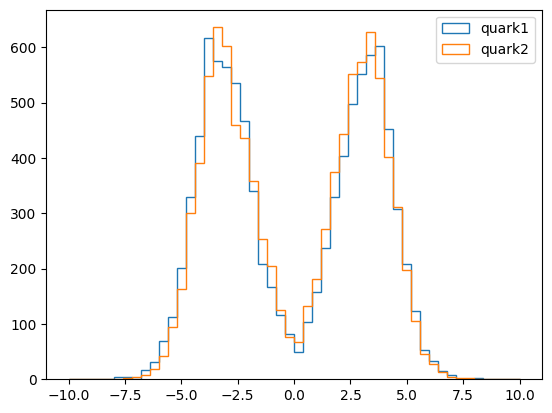

In [101]:

#plot delta eta for opposite eta
plt.figure()
plt.hist(abs(vbf_quarks_last_opposite_eta.eta[:,0] - vbf_quarks_last_opposite_eta.eta[:,1]), bins=50, range=(0,10), histtype='step', label='delta eta')
plt.legend(loc='upper right')
plt.show()

#plot eta for opposite eta
plt.figure()
plt.hist(vbf_quarks_last_opposite_eta.eta[:,0], bins=50, range=(-10,10), histtype='step', label='quark1')
plt.hist(vbf_quarks_last_opposite_eta.eta[:,1], bins=50, range=(-10,10), histtype='step', label='quark2')
plt.legend(loc='upper right')
plt.show()